## 範例說明

* 使用 Python Generator 無限循環批次訓練圖檔

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

Using TensorFlow backend.


### 有限元素的 Generator，一次產生一個值。

以下範例程式碼每呼叫一次 next(generator)，其 for loop 就會跑一次，第一次回傳第一個值，第二次回傳第二個值，以此類推，直到迴圈執行結束再呼叫時，就會得到 StopIteration 的例外。

In [2]:
def value_generator(value_list):
    for x in value_list:
        yield x

In [3]:
value_list = [1, 2, 3, 4, 5]
generator = value_generator(value_list)
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))

1
2
3
4
5


StopIteration: 

### 無限循環的 Generator，使用 While True 改寫即可。

In [4]:
def value_generator(value_list):
    while True:
        for x in value_list:
            yield x

In [5]:
value_list = [1, 2, 3, 4, 5]
generator = value_generator(value_list)
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))
print(next(generator))

1
2
3
4
5
1
2
3
4
5


### 無限隨機的 CIFAR-10 Generator，一次產生 32 張圖。

In [6]:
def cifar10_generator(x, y, batch_size=32):
    total = x.shape[0]
    idx_list = np.arange(total)
    while True:
        np.random.shuffle(idx_list)
        idx_matrix = [idx_list[i * batch_size:(i + 1) * batch_size] for i in range(int(math.ceil(total / batch_size)))]
        for idx_list in idx_matrix:
            yield x[idx_list], y[idx_list]

def plot_fixed_sized_thumbnails(images, ncols=8, size=1):
    nrows = int(math.ceil(len(images) / ncols))
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, sharex=True, sharey=True, figsize=(ncols * size, nrows * size,))
    for i in range(nrows):
        for j in range(ncols):
            axes[i][j].imshow(images[i * ncols + j], cmap='rainbow', vmin=0, vmax=1)
            axes[i][j].set_axis_off()
    plt.show()

def display_cifar10_generator(generator):
    images, labels = next(generator)
    plot_fixed_sized_thumbnails(images)
    print(labels.reshape(-1, 8))

In [7]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
generator = cifar10_generator(X_train, y_train)

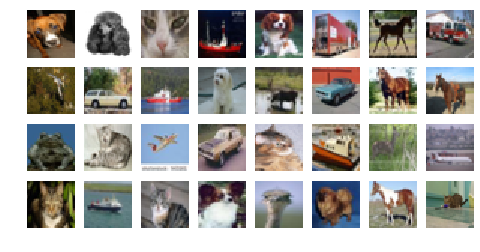

[[5 5 3 8 5 9 7 9]
 [2 1 8 5 4 1 7 7]
 [6 3 0 1 3 8 4 0]
 [3 8 3 5 2 5 7 3]]


In [8]:
display_cifar10_generator(generator)

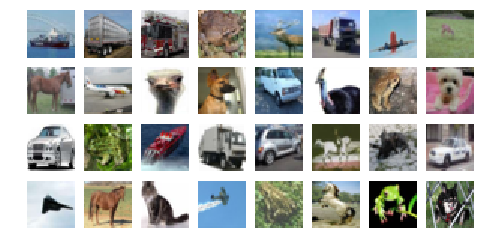

[[8 9 9 6 4 9 0 4]
 [7 0 2 5 1 2 6 5]
 [1 6 8 9 1 7 3 1]
 [0 7 3 0 6 7 6 5]]


In [9]:
display_cifar10_generator(generator)

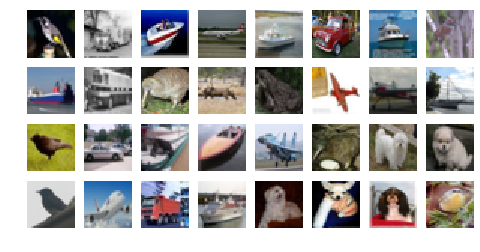

[[2 9 8 0 8 1 8 2]
 [8 9 2 4 6 0 0 8]
 [2 1 8 8 0 2 5 5]
 [2 0 9 8 5 5 5 2]]


In [10]:
display_cifar10_generator(generator)